# <font color=blue> steps</font>
1. begin to restyle the drop downs and update dashboard layout -- leaving map unfixed
2. create chloropleth for city council districts
3. fix size read error with mapbox not rendering
3. create a chart Class  and make the bar charts instances of the main chart class 

In [33]:

import warnings
warnings.filterwarnings(action='ignore')

from datetime import datetime

import charts
import data
from data import dframe
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

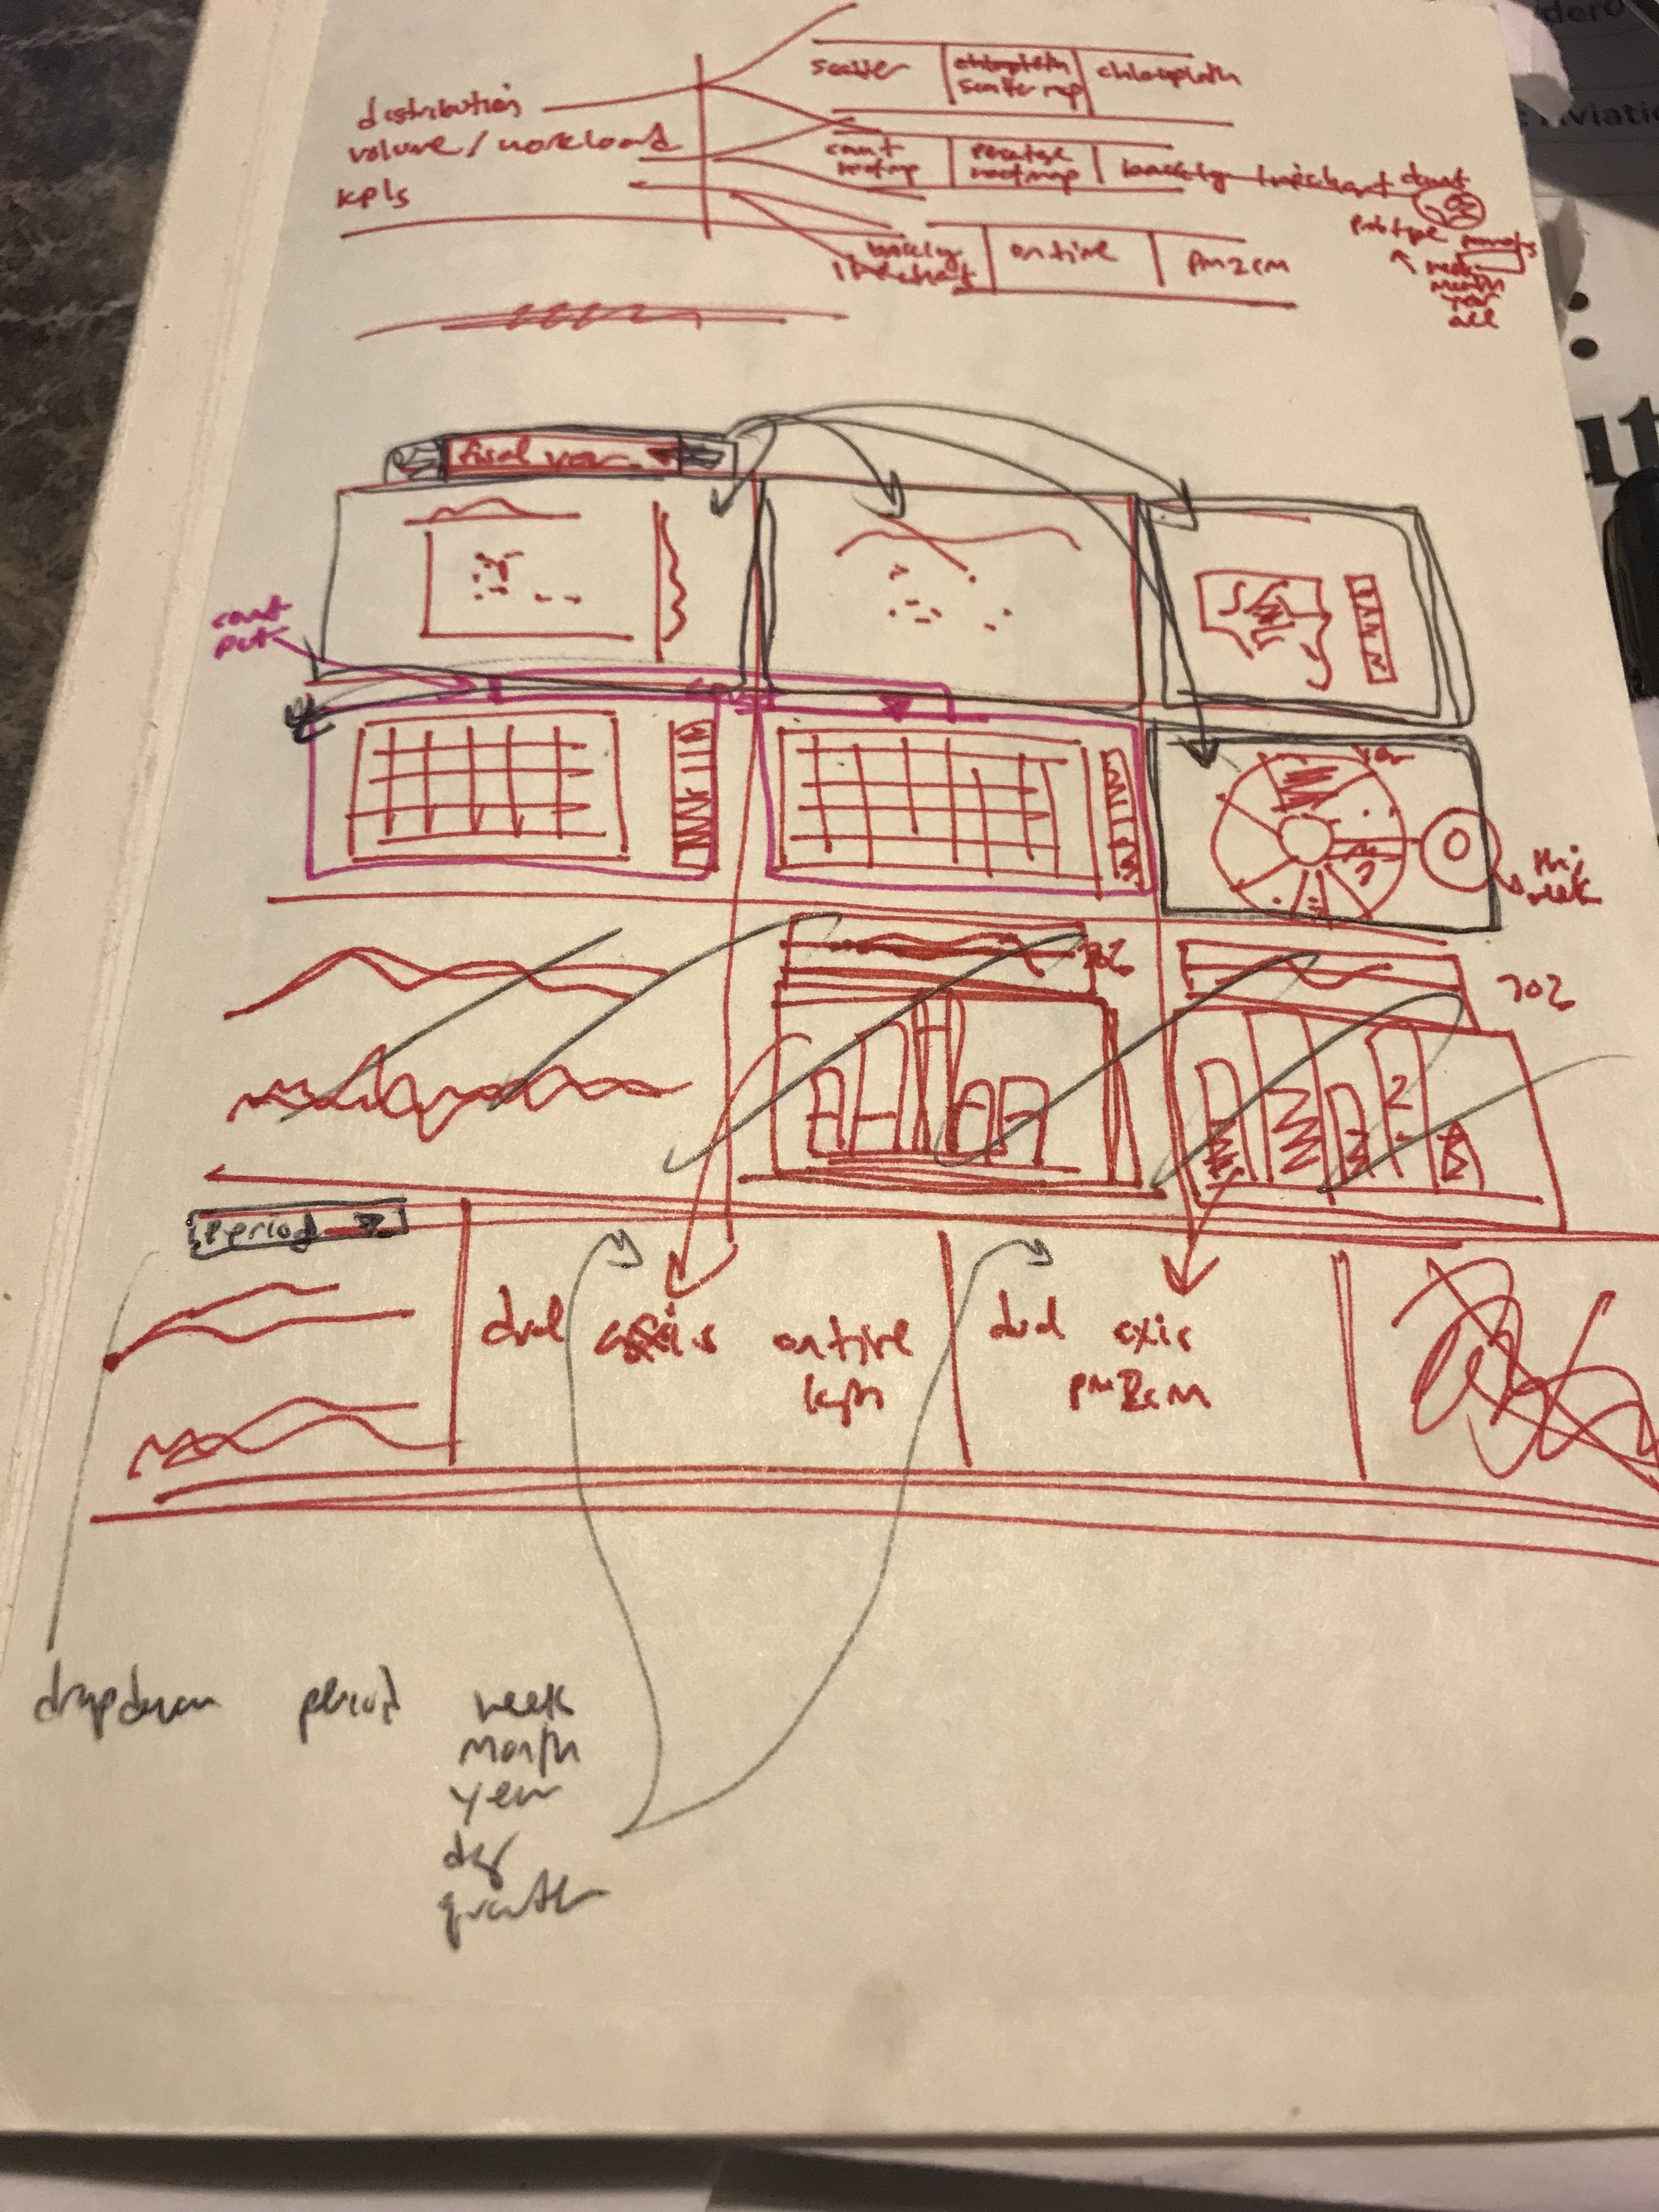

In [2]:
## update layout ##
#from IPython.display import Image
from IPython import display
display.Image(filename='IMG_3814.JPG')

In [37]:
dframe['fiscal_year_requested'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

In [4]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import jupyterlab_dash


In [11]:
# jupyterlab -dash extension for viewing dash apps
viewer = jupyterlab_dash.AppViewer()

In [38]:
app = dash.Dash('update-layout')
app.css.append_css({'external_url': 'https://cdn.rawgit.com/plotly/dash-app-stylesheets/2d266c578d2a6e8850ebce48fdb52759b2aef506/stylesheet-oil-and-gas.css'})  


app.layout = html.Div([
    # dropdown widget above row 1 
    html.Div([
        html.Div([dcc.Dropdown(
        id = 'input-for-first-4-charts',
        options = [{'label':year, 'value': year} for year in dframe['fiscal_year_requested'].unique()],
        multi = False,
        value = 2015)],  
                 
        className = 'two columns'
                )],
        
    className = 'twelve columns'),
    
    # row 1
    html.Div([
        html.Div(
        [dcc.Graph(
            id = 'volume-scatterchart',
            config = {} # for configuration of plotly charts,  
        )],
            
        className = 'four columns',
        style = {'margin-top': '20'}),
    
    html.Div(
        [dcc.Graph(
            id = 'scattermap',
            config = {} # for configuration of plotly charts,  
        )], 
        
        className = 'four columns',
        style = {'margin-top': '20'}),
    
    html.Div(
        [dcc.Graph(
            id = 'choropleth-map',
            config = {} # for configuration of plotly charts,  
        )], 
        
        className = 'four columns',
        style = {'margin-top': '20'})
            ]),
    
    # dropdown widget above row 2 
    html.Div([
        html.Div([dcc.Dropdown(
        id = 'input-for-heatmaps',
        options = [{'label':option, 'value': option} for option in ['count','percent']],
        multi = False,
        value = 'count')],  
                 
        className = 'two columns'
                )],
        
    className = 'twelve columns'),
    
    # row 2
    html.Div([
        html.Div(
        [dcc.Graph(
            id = 'heatmap-weekly',
            config = {} # for configuration of plotly charts,  
        )], 
            
        className = 'four columns',
        style = {'margin-top': '20'}),
    
    html.Div(
        [dcc.Graph(
            id = 'heatmap-monthly',
            config = {} # for configuration of plotly charts,  
        )], 
        
        className = 'four columns',
        style = {'margin-top': '20'}),
    
    html.Div(
        [dcc.Graph(
            id = 'donut-chart',
            config = {} # for configuration of plotly charts,  
        )], 
        
        className = 'four columns',
        style = {'margin-top': '20'})
            ]),
    
    # dropdown widget above row 3 
    html.Div([
        html.Div([dcc.Dropdown(
        id = 'input-for-performance-charts',
        options = [{'label':period, 'value': period} for period in ['day','week','month','quarter','year']],
        multi = False,
        value = 'quarter')],  
                 
        className = 'two columns'
                )],
        
    className = 'twelve columns'),
    
    # row 3
    html.Div([
        html.Div(
        [dcc.Graph(
            id = 'backlog-linechart',
            config = {} # for configuration of plotly charts,  
        )], 
            
        className = 'four columns',
        style = {'margin-top': '20'}),
    
    html.Div(
        [dcc.Graph(
            id = 'ontime-kpi',
            config = {} # for configuration of plotly charts,  
        )], 
        
        className = 'four columns',
        style = {'margin-top': '20'}),
    
    html.Div(
        [dcc.Graph(
            id = 'pm2cm-kpi',
            config = {} # for configuration of plotly charts,  
        )], 
        
        className = 'four columns',
        style = {'margin-top': '20'})
            ]),
    
])




## Callbacks for dashboard interactivity

@app.callback(
    dash.dependencies.Output(
        component_id = 'volume-scatterchart',
        component_property = 'figure'),
    
    [dash.dependencies.Input(
        component_id = 'input-for-first-4-charts',
        component_property = 'value')])
def generate_scatterplot(dropdown_year):
    return charts.duration_vs_volume(dframe=dframe,
                                    fiscalyear_column='fiscal_year_requested',
                                    year=dropdown_year)





## display app in jupyter notebook
viewer.show(app)

In [7]:
# plotly example 
app = dash.Dash()
app.layout = html.Div([
    html.Div(
        className="row",
        children=[
            html.Div(
                className="six columns",
                children=[
                    html.Div(
                        children=dcc.Graph(
                            id='left-graph',
                            figure={
                                'data': [{
                                    'x': [1, 2, 3],
                                    'y': [3, 1, 2],
                                    'type': 'bar'
                                }],
                                'layout': {
                                    'height': 800,
                                    'margin': {
                                        'l': 10, 'b': 20, 't': 0, 'r': 0
                                    }
                                }
                            }
                        )
                    )
                ]
            ),
            html.Div(
                className="six columns",
                children=html.Div([
                    dcc.Graph(
                        id='right-top-graph',
                        figure={
                            'data': [{
                                'x': [1, 2, 3],
                                'y': [3, 1, 2],
                                'type': 'bar'
                            }],
                            'layout': {
                                'height': 400,
                                'margin': {'l': 10, 'b': 20, 't': 0, 'r': 0}
                            }
                        }
                    ),
                    dcc.Graph(
                        id='right-bottom-graph',
                        figure={
                            'data': [{
                                'x': [1, 2, 3],
                                'y': [3, 1, 2],
                                'type': 'bar'
                            }],
                            'layout': {
                                'height': 400,
                                'margin': {'l': 10, 'b': 20, 't': 0, 'r': 0}
                            }
                        }
                    ),

                ])
            )
        ]
    )
])

app.css.append_css({
    'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
})



In [9]:
viewer.show(app)

## <font color=red> may need to look at what happens or add in as parameter, for when pm to cm is calculated with only completed pms (but still open cms)</font>